In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset import *
from save_load import *
from NN_library.PINN.PINN import *
from NN_library.PINN.train_PINN import *
%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
data = dataset(2**12, [0, 2*np.pi], [0, 2*np.pi])
loaders = get_loaders(data, 512)

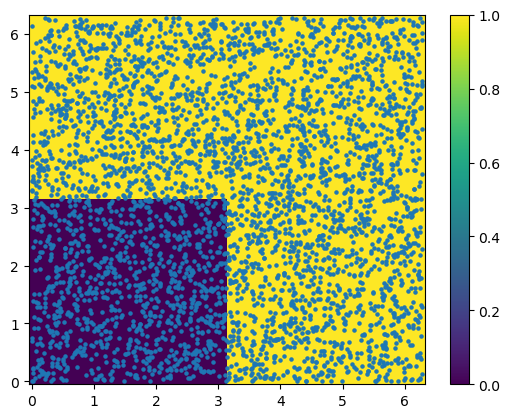

In [3]:
L = 2*np.pi
N = 64 # number of nodes in each direction including the border
H = torch.tensor([1, 0], device=dev).view(1, 2) # macrogradient
x = np.linspace(0, L, N, endpoint=True)
y = np.linspace(0, L, N, endpoint=True)

XY = np.meshgrid(x, y)
def a_function(x,y):
    a = np.where((x<np.pi)&(y<np.pi), 0.1, 1)
    return a
def A(x):
    a = torch.where((x[:,0]<np.pi)&(x[:,1]<np.pi), 0.1, 1).view(-1,1,1)
    I = torch.eye(2, device=dev).repeat(x.shape[0], 1, 1)
    A = a * I
    return A
Z = a_function(XY[0].flatten(),XY[1].flatten())
plt.pcolormesh(XY[0], XY[1], Z.reshape(N, N))
plt.scatter(data[:,0], data[:,1], s = 5)
plt.colorbar()

In [4]:
args = {'lr' : 0.00001, 'epochs' : 1000, 'dev' : dev, 'name' : 'NN_library/PINN/PINN'}

In [5]:
net = PINN(n_periodic=10, n_hidden=30, n_layers=5, period_len=L)

In [6]:
total_params = sum(p.numel() for p in net.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 5411


In [7]:
net = load_network(net, args['name']+'_999', args)

In [7]:
losses_train, losses_val = train(net, loaders, args, A, H)

Epoch: 0 mean train loss:  1.09299964e-01, mean val. rec. loss:  1.05724809e-01
Epoch: 1 mean train loss:  1.03240893e-01, mean val. rec. loss:  9.99860066e-02
Epoch: 2 mean train loss:  9.75230919e-02, mean val. rec. loss:  9.46129217e-02
Epoch: 3 mean train loss:  9.23409415e-02, mean val. rec. loss:  8.95316333e-02
Epoch: 4 mean train loss:  8.73825931e-02, mean val. rec. loss:  8.48163512e-02
Epoch: 5 mean train loss:  8.27652904e-02, mean val. rec. loss:  8.04581898e-02
Epoch: 6 mean train loss:  7.85004394e-02, mean val. rec. loss:  7.64280180e-02
Epoch: 7 mean train loss:  7.45344156e-02, mean val. rec. loss:  7.26918662e-02
Epoch: 8 mean train loss:  7.09220632e-02, mean val. rec. loss:  6.92042746e-02
Epoch: 9 mean train loss:  6.74967414e-02, mean val. rec. loss:  6.59975098e-02
Epoch: 10 mean train loss:  6.43969272e-02, mean val. rec. loss:  6.30065732e-02
Epoch: 11 mean train loss:  6.14455273e-02, mean val. rec. loss:  6.02590607e-02
Epoch: 12 mean train loss:  5.87517121

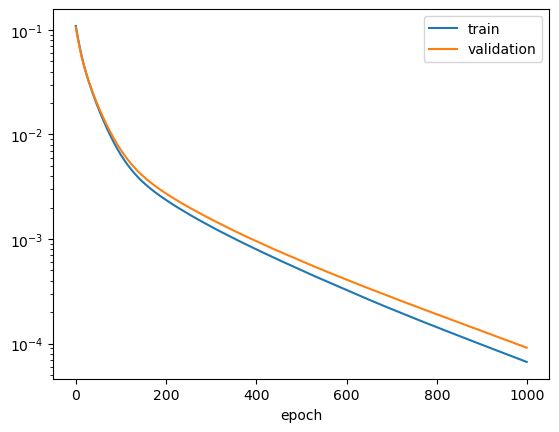

In [8]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.yscale('log')

In [9]:
grid_data = torch.tensor(np.vstack((XY[0].flatten(), XY[1].flatten())).T, dtype=torch.float, device=dev)

In [10]:
U = net(grid_data)

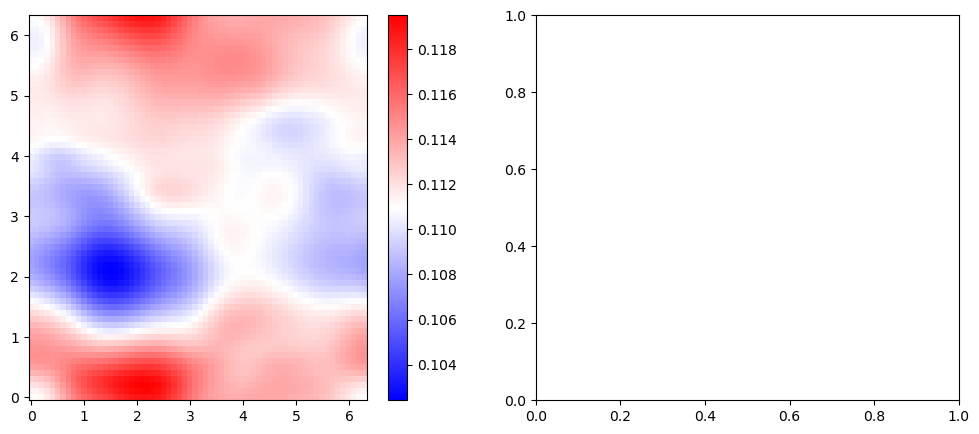

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
pos1 = axs[0].pcolormesh(XY[0], XY[1], U.reshape(N, N).detach().cpu(), cmap='bwr')
fig.colorbar(pos1, ax=axs[0])

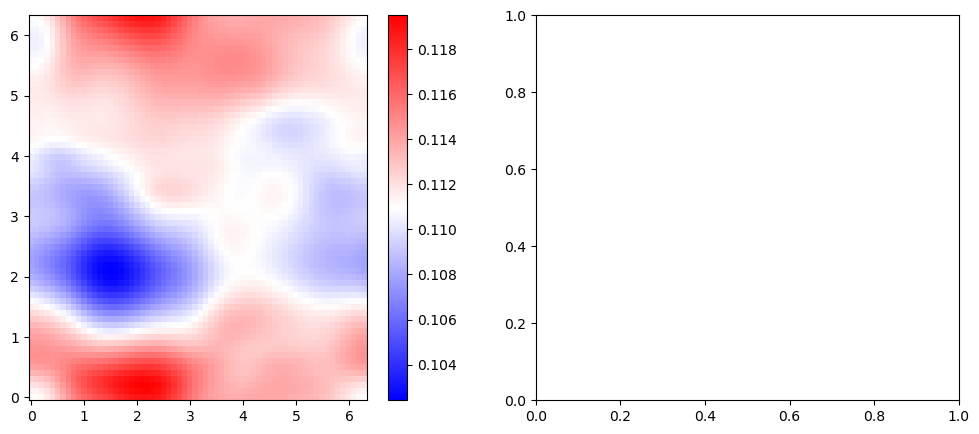

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
pos1 = axs[0].pcolormesh(XY[0], XY[1], U.reshape(N, N).detach().cpu(), cmap='bwr')
fig.colorbar(pos1, ax=axs[0])